<a href="https://colab.research.google.com/github/rommelgutierrez/Rommel/blob/main/LE2_Gutierrez_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Occupancy_Estimation.csv')

In [7]:
dataset.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [9]:
dataset.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [10]:
dataset.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [11]:
dataset.shape

(10129, 19)

In [12]:
dataset.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [15]:
numeric_dataset = dataset.select_dtypes(include=[np.number])
numeric_dataset = numeric_dataset.dropna()

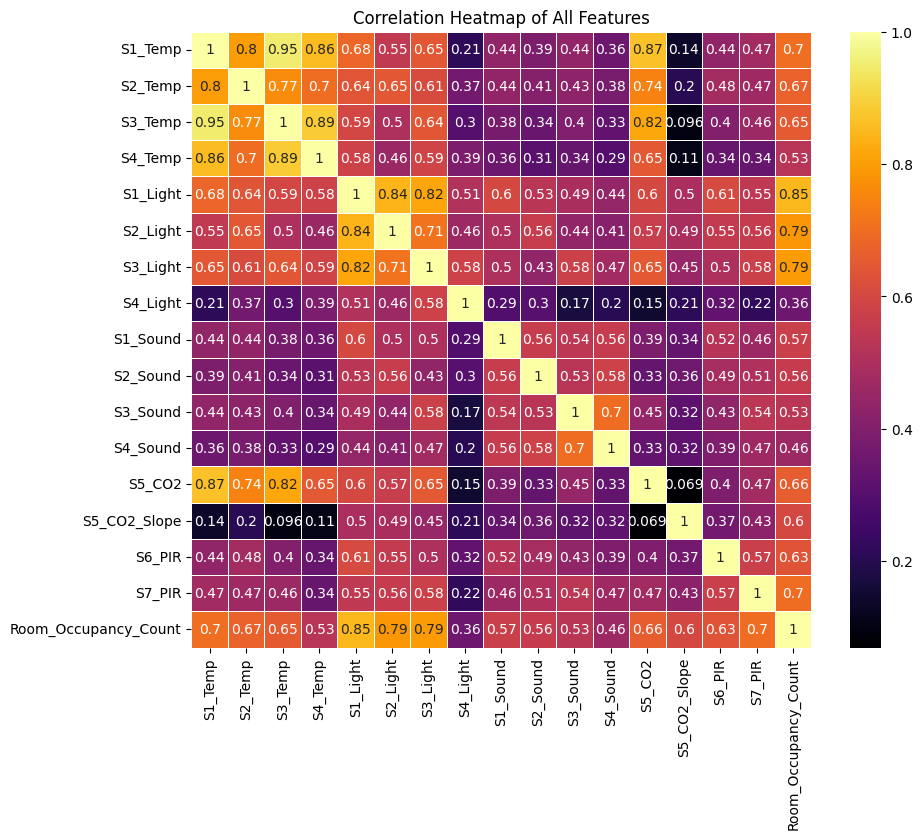

In [20]:
correlation_matrix_all = numeric_dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [21]:
X = numeric_dataset.drop('Room_Occupancy_Count' , axis=1)
y = numeric_dataset['Room_Occupancy_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb) * 100}')

log_reg = LogisticRegression(max_iter=50000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg) * 100}')
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dec_tree) * 100}')

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rand_forest) * 100}')

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100}')

random_seed = 42

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=50000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}

results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()),
    "Accuracy": list(results_all_features.values()),
})



Naive Bayes Accuracy: 95.65646594274433
Logistic Regression Accuracy: 98.9634748272458
Decision Tree Accuracy: 99.50641658440277
Random Forest Accuracy: 99.90128331688055
SVM Accuracy: 97.33464955577492


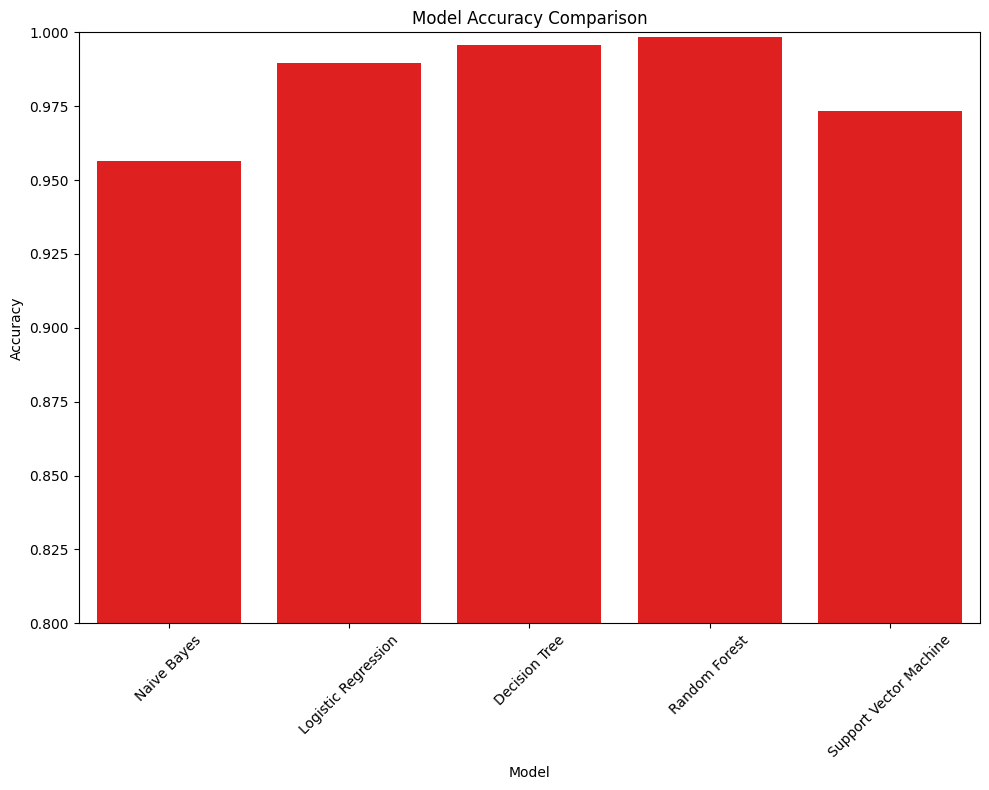

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(data=results_df, x='Model', y='Accuracy', color = 'red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()


In [17]:
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy
    print(classification_report(y_test, predictions))

print("Scores with all features:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1619
           1       1.00      0.96      0.98       103
           2       0.80      0.92      0.86       164
           3       0.69      0.72      0.71       140

    accuracy                           0.96      2026
   macro avg       0.87      0.90      0.88      2026
weighted avg       0.96      0.96      0.96      2026

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.98      0.94      0.96       164
           3       0.91      0.95      0.93       140

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.

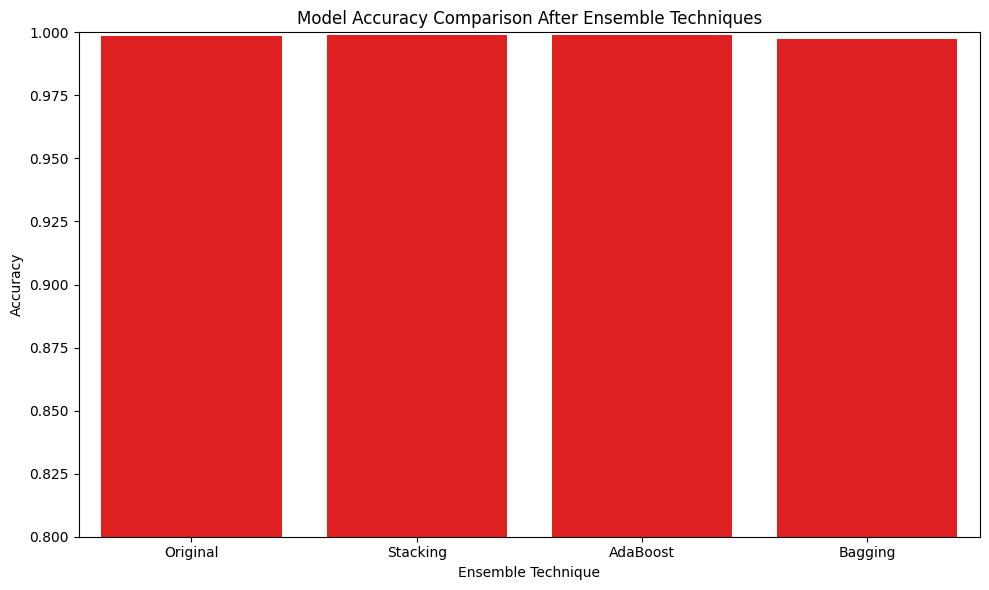

Summary of Model Accuracies:
Top Performing Model: RandomForestClassifier(random_state=42)
Original: 99.8519
Stacking: 99.9013
AdaBoost: 99.9013
Bagging: 99.7532


In [25]:
top_model_name = max(results_all_features, key=results_all_features.get)
top_model = models[top_model_name]

top_model.fit(X_train, y_train)
predictions_highest = top_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)


stacking_model = StackingClassifier(estimators=[('top_performing_model', top_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

adaboost_model = AdaBoostClassifier(estimator=top_model, n_estimators=100)
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)

bagging_model = BaggingClassifier(estimator=top_model, n_estimators=100)
bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)

models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(color = 'red', x=list(models_accuracy.keys()), y=list(models_accuracy.values()) )
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison After Ensemble Techniques')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

print("Summary of Model Accuracies:")
print("Top Performing Model:", top_model)
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy*100:.4f}")